In [1]:
from cocpit.interpretability.plot import Plot
from cocpit import config as config
import torch
import torch.nn as nn
import os
import PIL
import random
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
# define path where img list is (wront test images, wrong val images, etc. Those are ran on main DRIVE container)
path_imslist = "/home/csutter/DRIVE/site_analysis/pytorch_ims/Corr_LIE_East__baseline_vgg16__multiple__6class__kfold5_strat__test/filename_predictions/test_wrong.csv"

# define class and number of samples to subset 
cat = 'severe_snow'
model_cat = 'obs'
# sample = 12

df = pd.read_csv(path_imslist)

print(len(df))

sample_ims = df[1:10]['name']
# sample_ims = df[(df['cat'] == cat)&(df['model_cat']== model_cat)]['name']
# print(len(sample_ims))

# sample_ims = sample_ims #ADD LIMITATION HERE IF LEN ABOVE LON [1:15]

for image in sample_ims.index:
    print(image)

160
1
2
3
4
5
6
7
8
9


In [28]:
# look at one particular image
# PIL.Image.open(df["impath"][2])

1
/DRIVE/site_analysis/pytorch_ims/Corr_LIE_East__baseline_vgg16__multiple__6class__kfold5_strat__test/data/crop/wet/I_495_Exit_65_66_Rest_area__Eastbound__Skyline_2184_2022-01-28-22:15:18.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FE430D73C40>


/home/csutter/.local/lib/python3.9/site-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted: wet


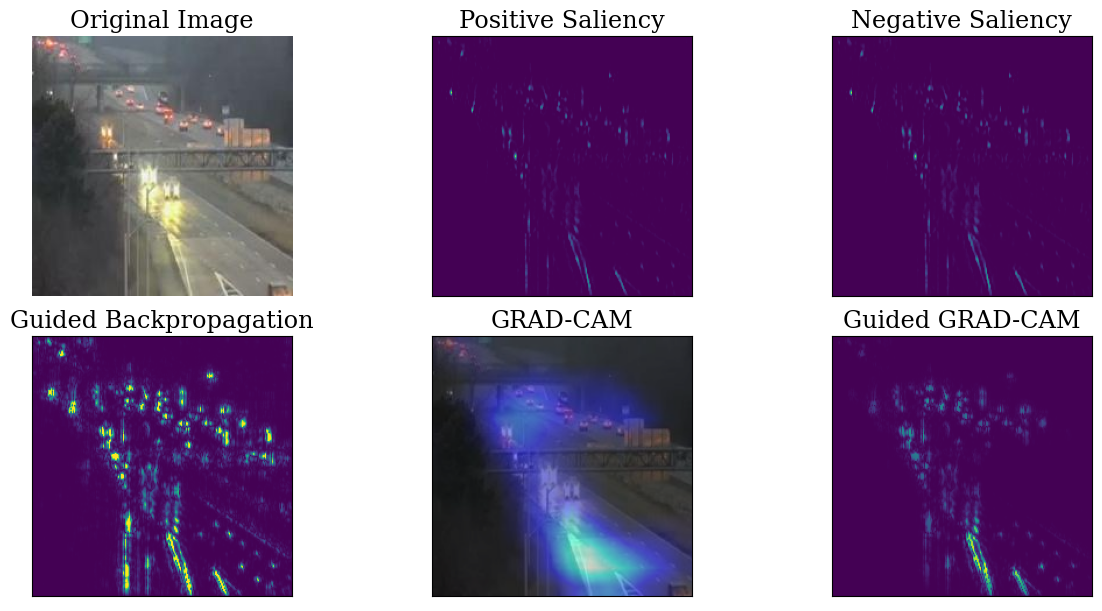

2
/DRIVE/site_analysis/pytorch_ims/Corr_LIE_East__baseline_vgg16__multiple__6class__kfold5_strat__test/data/crop/wet/I_495_Exit_65_66_Rest_area__Eastbound__Skyline_2184_2022-01-28-23:00:19.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FE43030A730>
predicted: obs


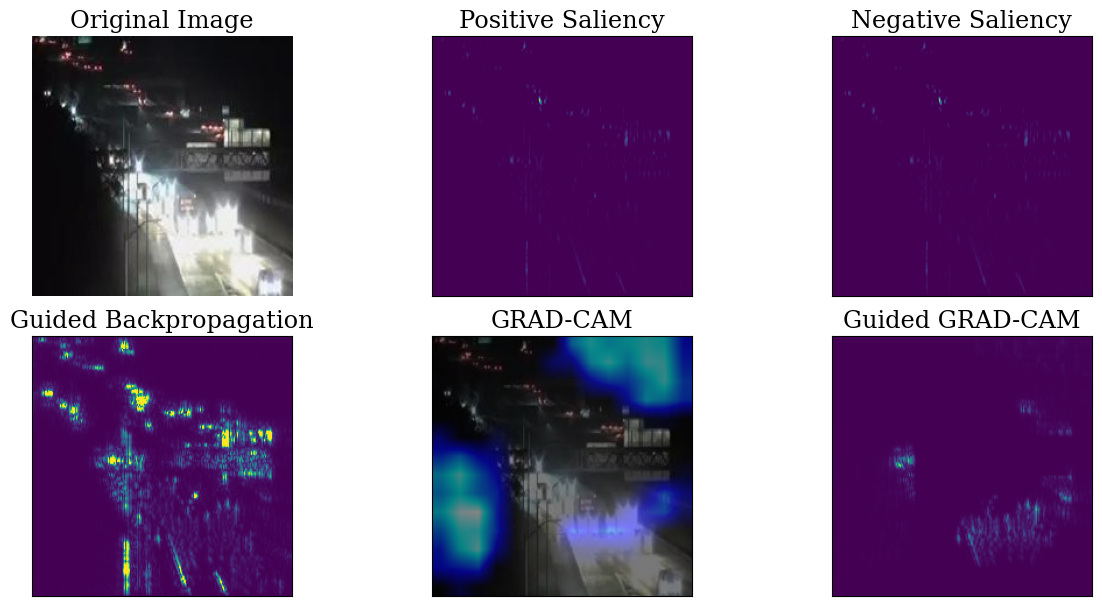

3
/DRIVE/site_analysis/pytorch_ims/Corr_LIE_East__baseline_vgg16__multiple__6class__kfold5_strat__test/data/crop/poor_viz/I_495_Exit_65_66_Rest_area__Eastbound__Skyline_2184_2022-02-03-02:00:23.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FE43026C580>
predicted: poor_viz


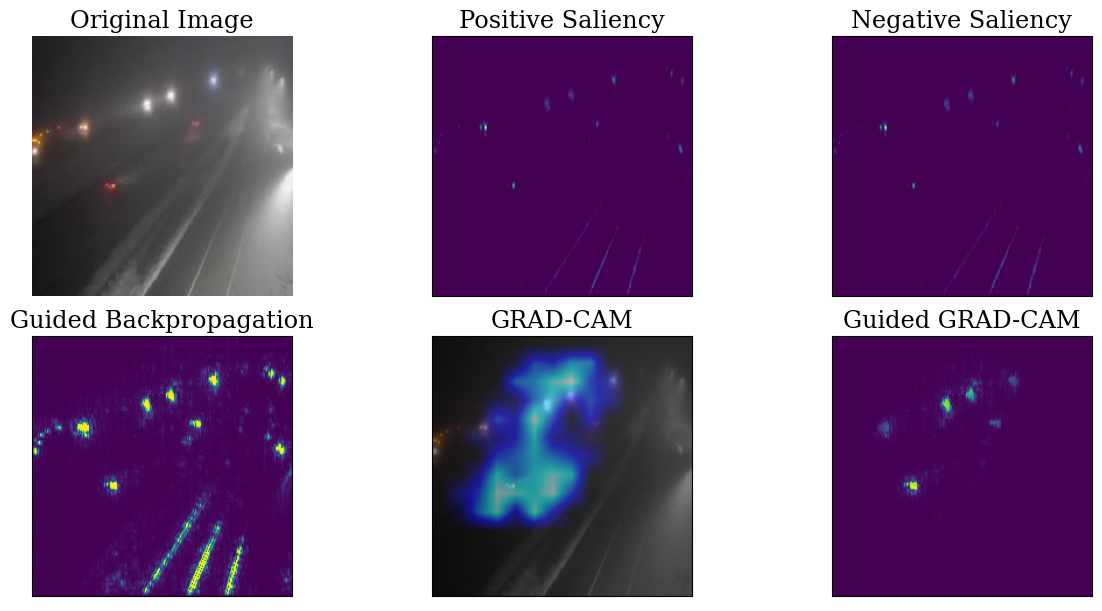

4
/DRIVE/site_analysis/pytorch_ims/Corr_LIE_East__baseline_vgg16__multiple__6class__kfold5_strat__test/data/crop/wet/I_495_Exit_65_66_Rest_area__Eastbound__Skyline_2184_2022-02-03-03:15:21.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FE430106EB0>
predicted: poor_viz


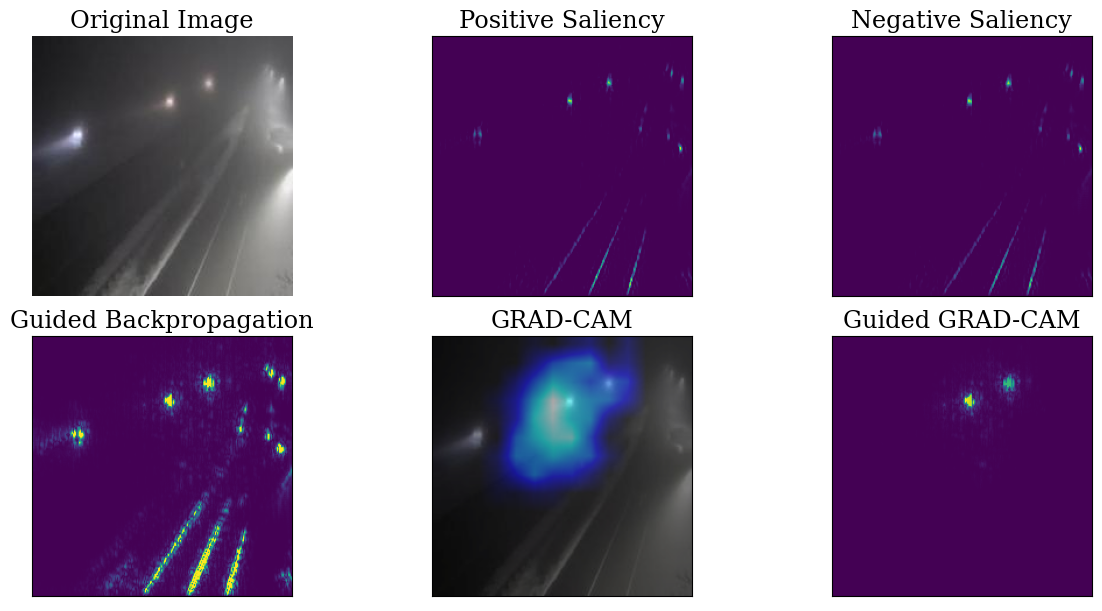

5
/DRIVE/site_analysis/pytorch_ims/Corr_LIE_East__baseline_vgg16__multiple__6class__kfold5_strat__test/data/crop/wet/I_495_Exit_65_66_Rest_area__Eastbound__Skyline_2184_2022-02-03-05:05:19.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FE406F0BA60>
predicted: wet


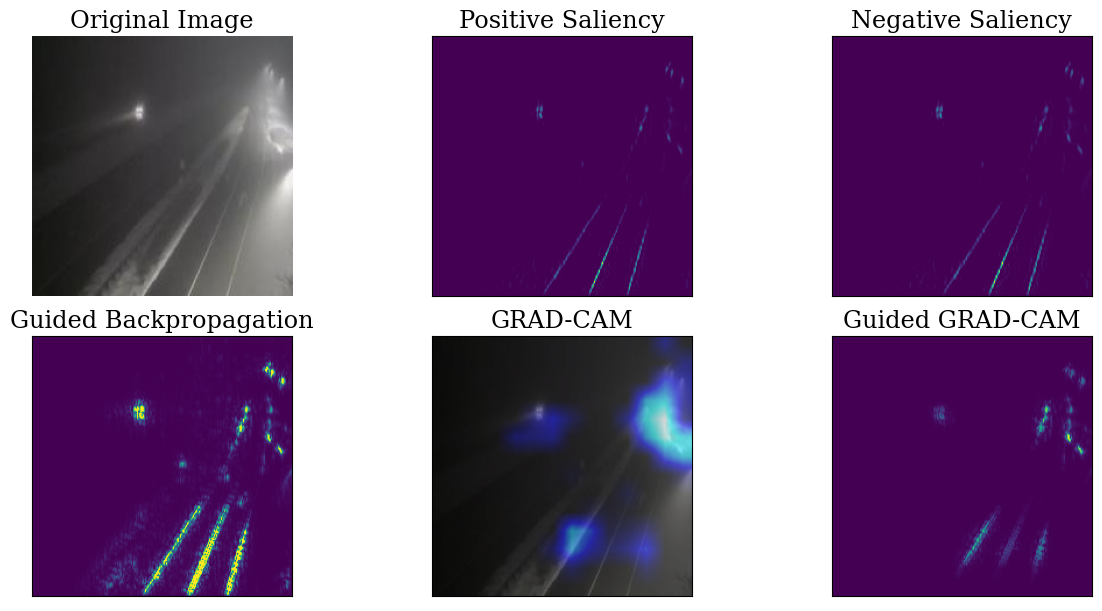

6
/DRIVE/site_analysis/pytorch_ims/Corr_LIE_East__baseline_vgg16__multiple__6class__kfold5_strat__test/data/crop/wet/I_495_Exit_65_66_Rest_area__Eastbound__Skyline_2184_2022-02-03-05:10:17.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FE4300ECA60>
predicted: poor_viz


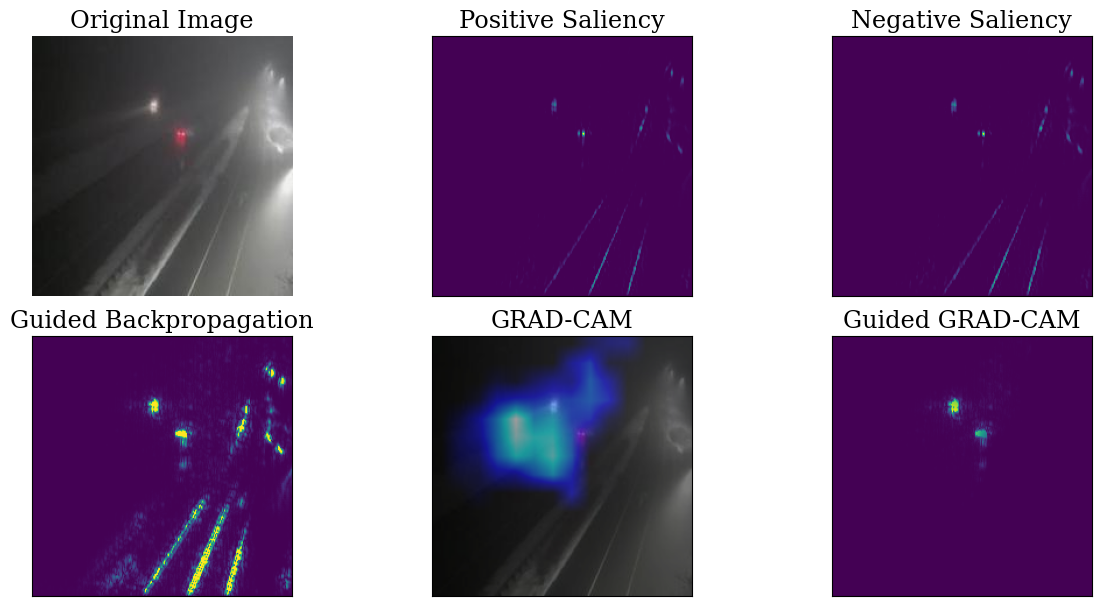

7
/DRIVE/site_analysis/pytorch_ims/Corr_LIE_East__baseline_vgg16__multiple__6class__kfold5_strat__test/data/crop/wet/I_495_at_Blue_Point_Rd__Eastbound__Skyline_1884_2022-02-03-04:00:05.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FE406F74E20>
predicted: poor_viz


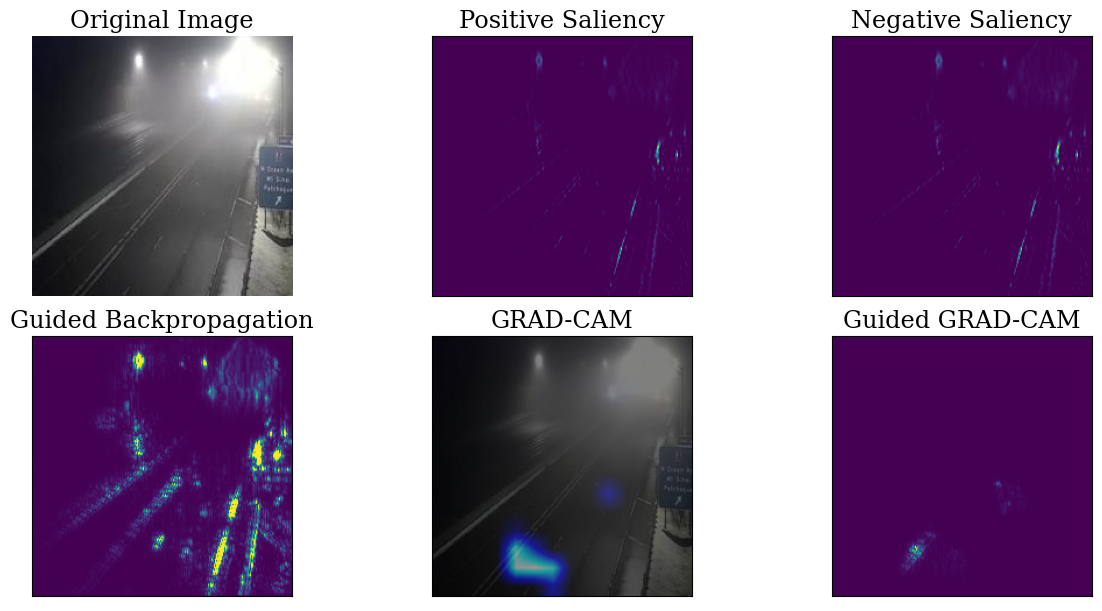

8
/DRIVE/site_analysis/pytorch_ims/Corr_LIE_East__baseline_vgg16__multiple__6class__kfold5_strat__test/data/crop/poor_viz/I_495_at_Blue_Point_Rd__Eastbound__Skyline_1884_2022-02-03-07:15:05.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FE406F3B970>
predicted: poor_viz


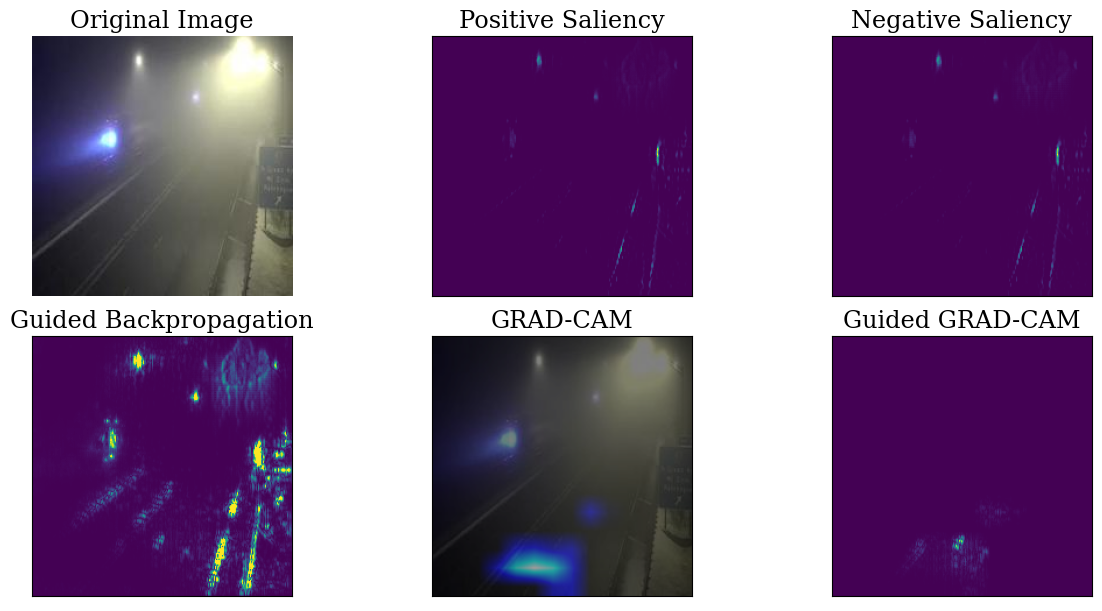

9
/DRIVE/site_analysis/pytorch_ims/Corr_LIE_East__baseline_vgg16__multiple__6class__kfold5_strat__test/data/crop/wet/I_495_at_Exit_53_Ramp___Wicks_Rd__Westbound__Skyline_5699_2022-02-03-03:00:51.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FE43003B5E0>
predicted: poor_viz


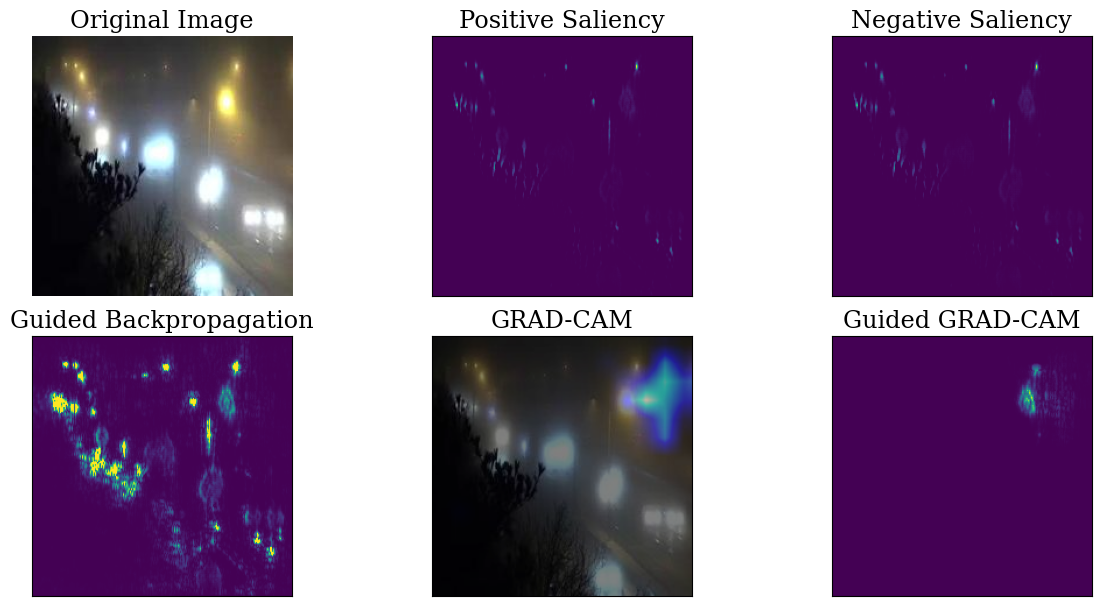

In [3]:
model = torch.load("/home/csutter/DRIVE_PYTORCH/saved_models/v0.0.0/e[48]_bs[64]_k0_['vgg16'].pt").to(config.DEVICE)
model = nn.DataParallel(model)

# new method of sampling
# sample_ims = df[df['cat'] == cat]['impath']

# sample_ims = random.sample(set(imgs), sample)

for image in sample_ims.index:
    print(image)
    impath = df["impath"][image]
    print(impath)
    # # print(image)
    # # df[df[]]
    openimage = PIL.Image.open(impath)#PIL.Image.open(f"{basedir}/{image}").resize((224, 224))
    p = Plot(model, openimage)
    print(openimage)
    p.interp_runner(openimage)
    fig = p.make_plots()
    fig.show()
    fig.close()

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7F441ECF7490>


/home/csutter/.local/lib/python3.9/site-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


predicted: wet


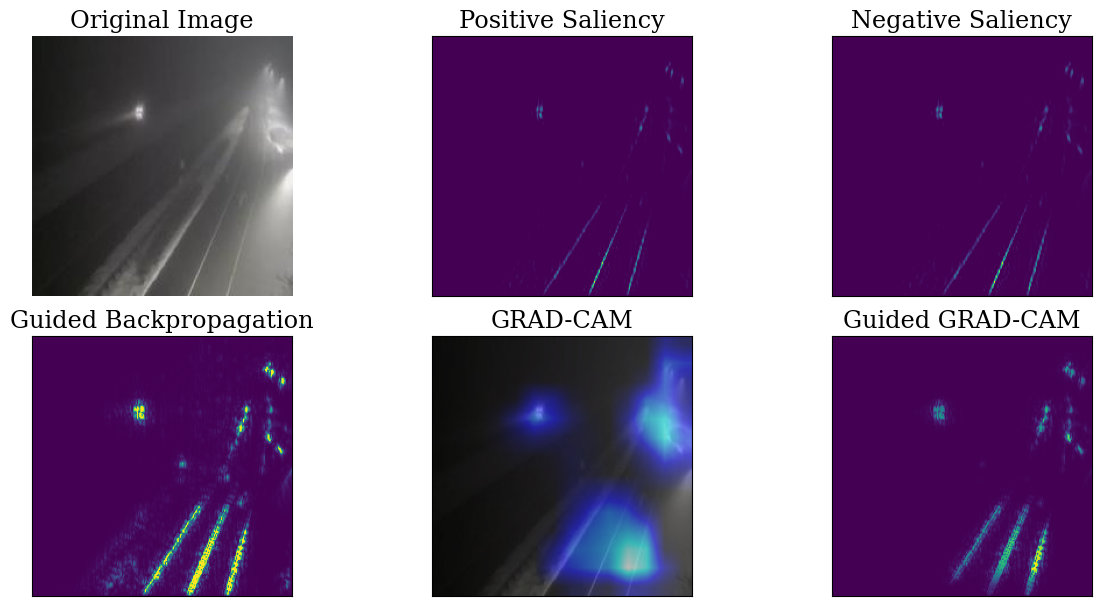

In [7]:
# do one example
openimage = PIL.Image.open('/home/csutter/DRIVE/site_analysis/pytorch_ims/Corr_LIE_East__baseline_vgg16__multiple__6class__kfold5_strat__test/data/crop/wet/I_495_Exit_65_66_Rest_area__Eastbound__Skyline_2184_2022-02-03-05:05:19.jpg')
p = Plot(model, openimage)
print(openimage)
p.interp_runner(openimage)
fig = p.make_plots()